<font color="FF3B3B"><h1 align="left">Proyecto de aprendizaje profundo</h1></font> 
<font color="#6E6E6E"><h2 align="left">Carga y analisis exploratorio de los datos</h2></font> 

##### David Alejandro Pedroza De Jesús
##### Joel Ezequiel Vicente Alonso

Cargamos las librerias para la realización del proyecto

In [3]:
import kagglehub
import os 
from shutil import move
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

#   Descarga y carga de los datos
Estos solo se ejecuta en caso de no tener los datos ya descargados.

In [4]:
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")
move(path,os.getcwd())
os.rename("2","Datos")

100%|██████████| 385M/385M [00:11<00:00, 35.2MB/s] 

Extracting files...


Ahora vamos a cargar el fichero de `cards.csv`, en este podemos obtener las rutas de las imagenes, clases y que conjunto pertenece para imagen (train,test o valid).Para ello usaremos la libreria pandas

In [5]:
datos = pd.read_csv("Datos\cards.csv")
datos.head()

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


Con esto podremos cargar las imagenes de forma más fácil, ya que solo necesitamos la columna **filepaths**.

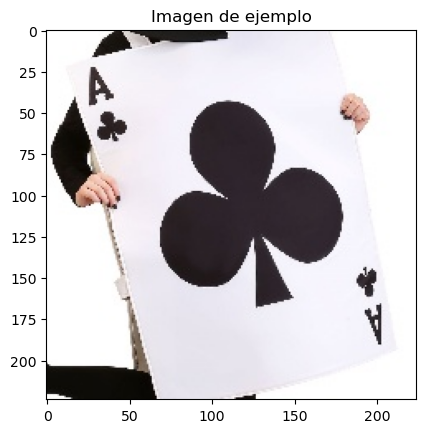

In [6]:
ex_ima = cv2.imread(r"Datos/" + datos.filepaths[0])
ex_ima_rgb = cv2.cvtColor(ex_ima, cv2.COLOR_BGR2RGB)
plt.imshow(ex_ima_rgb)
plt.title("Imagen de ejemplo")
plt.show()

##  Caracteristicas del data set
Estas son las caracteristicas básicas del dataset.

In [7]:
num_train = datos[datos["data set"] == "train"].shape[0]
num_test = datos[datos["data set"] == "test"].shape[0]
num_valid = datos[datos["data set"] == "valid"].shape[0]
print(f"Numero de columnas del dataset: {datos.shape[0]}")
print(f"Numero de variables del dataset: {datos.shape[1]}")
print(f"Numero de NAs por cada variable: \n{np.sum(datos.isna())}")
print("______________________________________________")
print(f"Imagenes de train: {num_train}, porcentaje {100*num_train/datos.shape[0]:.2f}%")
print(f"Imagenes de test: {num_test}, porcentaje {100*num_test/datos.shape[0]:.2f}%")
print(f"Imagenes de validación: {num_valid}, porcentaje {100*num_valid/datos.shape[0]:.2f}%")
print("______________________________________________")


Numero de columnas del dataset: 8155
Numero de variables del dataset: 5
Numero de NAs por cada variable: 
class index    0
filepaths      0
labels         0
card type      0
data set       0
dtype: int64
______________________________________________
Imagenes de train: 7625, porcentaje 93.50%
Imagenes de test: 265, porcentaje 3.25%
Imagenes de validación: 265, porcentaje 3.25%
______________________________________________


c:\Users\David\miniconda3\envs\DL\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Veamos si hay valores inusuales en el data set, esto es muy importante ya que, en el no solo se encuentra las rutas de las imagenes, sino que también tienen las etiquetas de cada carta.No tomaremos en cuenta las rutas de momento debido que lo normal es que todos sean diferentes y no tendría mucho sentido.

In [8]:
cols = [col for col in datos.columns if col != "filepaths"]
for i in cols:
    print("_________________________________________________________________________")
    print(f"Valores unicos para la variable {i}:")
    print(datos[i].unique())

_________________________________________________________________________
Valores unicos para la variable class index:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
_________________________________________________________________________
Valores unicos para la variable labels:
['ace of clubs' 'ace of diamonds' 'ace of hearts' 'ace of spades'
 'eight of clubs' 'eight of diamonds' 'eight of hearts' 'eight of spades'
 'five of clubs' 'five of diamonds' 'five of hearts' 'five of spades'
 'four of clubs' 'four of diamonds' 'four of hearts' 'four of spades'
 'jack of clubs' 'jack of diamonds' 'jack of hearts' 'jack of spades'
 'joker' 'king of clubs' 'king of diamonds' 'king of hearts'
 'king of spades' 'nine of clubs' 'nine of diamonds' 'nine of hearts'
 'nine of spades' 'queen of clubs' 'queen of diamonds' 'queen of hearts'
 'queen of spades' 'seven of clubs' 'seven of diam

Por lo visto no hay nada que necesite ser arreglado, podríamos afirmar que ya podemos empezar a trabajar en el pero nos gustaría ver si las rutas son funcionales.

##  Verificar las rutas.
En este punto tocaremos rápidamente si todas las rutas funcióna para cargar los datos.

In [9]:
rutas_adaptadas = ["Datos/" +  ruta for ruta in datos["filepaths"]]
im_buenas = []
im_malas = []
for ru in rutas_adaptadas:
    im = cv2.imread(ru)
    if  im is not None:
        im_buenas.append(ru)
    else:
        im_malas.append(ru)
print(f"Lecturas correctas: {len(im_buenas)}")
print(f"Lecturas incorrectas: {len(im_malas)}")

Lecturas correctas: 8154
Lecturas incorrectas: 1


Vemos que casi esto es correcto salvo una ruta que parece estar incorrecta, debido a que `imread` no es capaz de leerla, si miramos el registro incorrrecto.

In [10]:
datos[np.array(rutas_adaptadas) == np.array(im_malas)]

,class index,filepaths,labels,card type,data set
120,0,train/ace of clubs/output,ace of clubs,ace,train


Este registro es claramente incorrecto debido a que no sigue el criterio de ninguna de las rutas normales, por lo que podemos asumirlo como un error y precindir de este, ya que es solo uno entre 8155

In [11]:
df_limpio = datos[np.array(rutas_adaptadas) != np.array(im_malas)]

Vemos que no hay problemas ahora

In [12]:
rutas_adaptadas = ["Datos/" +  ruta for ruta in df_limpio["filepaths"]]
im_buenas = []
im_malas = []
for ru in rutas_adaptadas:
    im = cv2.imread(ru)
    if  im is not None:
        im_buenas.append(ru)
    else:
        im_malas.append(ru)
print(f"Lecturas correctas: {len(im_buenas)}")
print(f"Lecturas incorrectas: {len(im_malas)}")

df_limpio["rutas_adap"] = rutas_adaptadas

Lecturas correctas: 8154
Lecturas incorrectas: 0


C:\Users\David\AppData\Local\Temp\ipykernel_12156\3133555754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["rutas_adap"] = rutas_adaptadas


##  Etiquetados

En este punto veremos si las imagenes estan correctamente etiquetados, para ello y para facilitar más las cosas crearemos una función que realizará la comprobación del etiquetado.

In [18]:
df_limpio["filepaths"][0].split("/")[1]

'ace of clubs'

In [19]:
def Ok_label(path, label):
    res = False
    true_lab = path.split("/")[1]
    if true_lab == label:
        res = True
    return res

In [ ]:
good_label = []
bad_label = []
for path,label in zip(df_limpio["filepaths"], df_limpio["labels"]):
    if Ok_label(path, label):
        good_label.append(label)
    else:
        bad_label.append(label)
        
print(f"Etiquetas correctas: {len(good_label)}")
print(f"Etiquetas incorrectas: {len(bad_label)}")

Etiquetas correctas: 8154
Etiquetas incorrectas: 0


#   Distribución de la cantidad de imagenes
En este punto veremos como estan distribuidas las imagenes de cada clase, con esto podemos ver si estamos tratando con clases desbalanceadas o no.Para comprobarlo realizaremos graficos de barras para cada conjunto.

In [72]:
def distribution_plot_gen(df,set):
    
    df_count = df_limpio.labels[df_limpio["data set"] == set].value_counts()

    plt.figure(figsize=(10,5))
    plt.bar(df_count.index,df_count)
    plt.title(f"Numero de imagenes por clase en el conjunto {set}")
    plt.xticks(rotation=90)
    plt.xlabel("Clases")
    plt.ylabel("Numero de imagenes")
    plt.show()

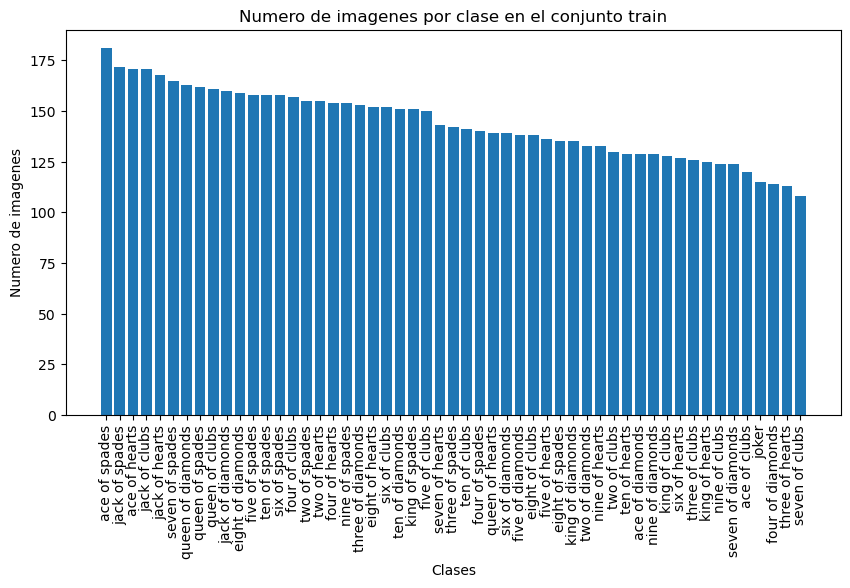

In [73]:
distribution_plot_gen(df_limpio,"train")

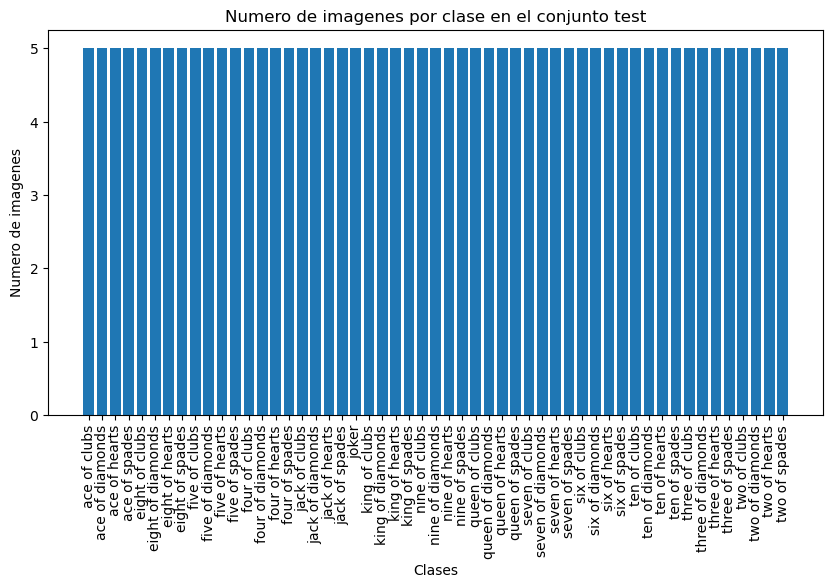

In [74]:
distribution_plot_gen(df_limpio,"test")

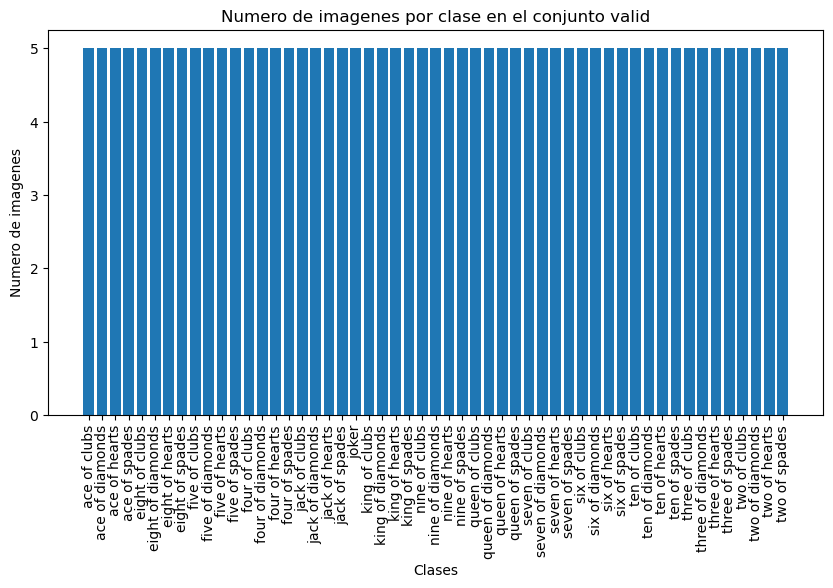

In [75]:
distribution_plot_gen(df_limpio,"valid")